<a href="https://colab.research.google.com/github/adenisenko01/am115/blob/main/AM115_pset1_Aleksandra_Denisenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AM 115 Problem Set 1: Aleksandra Denisenko**

##**Problem 1: Maximum Likelihood Estimation (10 points)**

*Suppose the World Series were best of 3 games. Assume like Mostellar that each game is a Bernoulli trial with probability p. Assume that we see n0 events where the losing team wins 0 games, n1 events where the losing team wins 1 game.*

$1.$ **I am going to derive the likelihood of the observations where the losing team wins $0$ events $n_0$ times and $1$ event $n_1$ times, given that each game is a Bernouli trial with probability $p$ and the game is the best-of-three.**

First, let's define the probability of the first team to win: $P(w_1) = p$;
The probability of the second team to win is $P(w_2)=1-p$.

The losing team can win $0$ times if the winning team wins the first $2$ rounds or if the losing team loses the first two rounds. Then the probability that the losing team will win $0$ times is defined as $P(0) = p^2 +(1-p)^2$

Then, there are two ways for the losing team to win just one round. For team A: WLL or LWL, for team B: WLL or LWL, so there are just two permutations for both teams that make it possible.

Then, $P(1)= 2p^2*(1-p) + 2(1-p)^2p$

The probability of observing the result $n_0$ (2:0) is $[P(2-0)]^n_0$ as the events are independent. The probability of obserwing the result $n_1$ is $[P(2-1)]^n_1$ due to the same reasoning.

**Therefore, the likelihood of the observations for the best-of-three games with the losing team winning $0$ times in $n_0$ events and $1$ time in $n_1$ event is:** $$
L(p) = (p^2+(1-p)^2)^{n_0}* (2p^2*(1-p) + 2(1-p)^2p)^{n_1}
$$


$2.$ *Analytical derivation using the log-likelihood calculated in $a$ is based on the fact that the derivative of this function with respect to $p$ yields the maximum likelihood when set to zero*.

**First, find the log-likelihood to simplify calculations. The overall log-likelihood:**
$$
\ln L(p) = n_0 ln(p^2+(1-p)^2) + n_1 ln(2p^2*(1-p) + 2(1-p)^2p)$$

**Then, we will take a derivative with respect to $p$ and set it to $0$.**
Given:
$$\frac{d}{dp} [n_0 ln(p^2+(1-p)^2) + n_1 ln(2p^2*(1-p) + 2(1-p)^2p)] = 0$$

**According to Wolfram Alpha, the derivative is:**
$$
\frac{d}{dp}\left(n_0 \log(p^2 + (1 - p)^2) + n_1 \log(2 p^2 (1 - p) + 2 (1 - p)^2 p)\right) = $$ $$\frac{(2 p - 1) (n_1 (2 p^2 - 2 p + 1) - 2 n_0 (1 - p) p)}{(p - 1) p (2 p^2 - 2 p + 1)}
$$

Setting it equal to zero:

**Again using Wolfram alpha:** $$2 p^2 - 2 p + 1 \neq 0, $$$$ n_1 = \frac {-2 (n_0 p^2 - n_0 p)}{2 p^2 - 2 p + 1}, $$$$p^2 - p \neq 0$$
$$p=0.5$$.

This expression gives me the **MLE $p = 0.5$**, based on my observations of how many games the losing team wins.


$3.$ *Calculate $p$ from the MLE equation above given the data.*

In [ ]:
won_by_losing_team = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
           1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
           1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
           0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
           1, 1, 0, 0]

n1 = won_by_losing_team.count(1)
n0 = won_by_losing_team.count(0)

p_analytic = n1 / (n0 + n1)

print(f'Maximum likelihood estimate for p: {p_analytic:.3f}')

Maximum likelihood estimate for p: 0.523


**Via the code above, the MLE = $0.523$.**

$4.$

In [ ]:
## 4) I will find the numeric estimate of the MLE following the code from the class
# define bernoulli log-likelihood
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
# Define Bernoulli negative log-likelihood
def NLL_bernoulli(p, trials):
    '''Bernoulli negative log-likelihood'''
    trials = np.array(trials)
    neg_log_likelihood = -np.sum(trials * np.log(p) + (1 - trials) * np.log(1 - p))
    return neg_log_likelihood

# Initial (random) guess for p
p_init = np.random.uniform()

# Minimize with scipy routines
epsilon = 1e-5
opt_results = scipy.optimize.minimize(
    lambda p: NLL_bernoulli(p[0], won_by_losing_team),
    [p_init],
    bounds=[(epsilon, 1 - epsilon)]
)

p_numeric = opt_results.x.squeeze()
print(f'Numeric min. p = {p_numeric:.3f}')

Numeric min. p = 0.523


**Via the code above, numeric min = $0.523$.**

In [ ]:
print(f'Analytic estimate\t p = {p_analytic:.3f}')
print(f'Numeric estimate\t p = {p_numeric:.3f}')

Analytic estimate	 p = 0.523
Numeric estimate	 p = 0.523


**As we found above, numeric estimation for the MLE and the analytical calculation give the same result $p=0.523$.**

All the code above was borrowed and adapted from lecture notebook.

##**Problem 2: Variants on Mostellar (10 points)**
*1. Mosteller analyzed 44 world series and determined that p = 0.65. Take this value of p
and carry out a Monte Carlo simulation of 44 different world series (each with at most
7 games), and compare the distribution of the number of games that the losing team
wins to Mostellar’s results. Now repeat this exercise but with 4400 different world
series.*

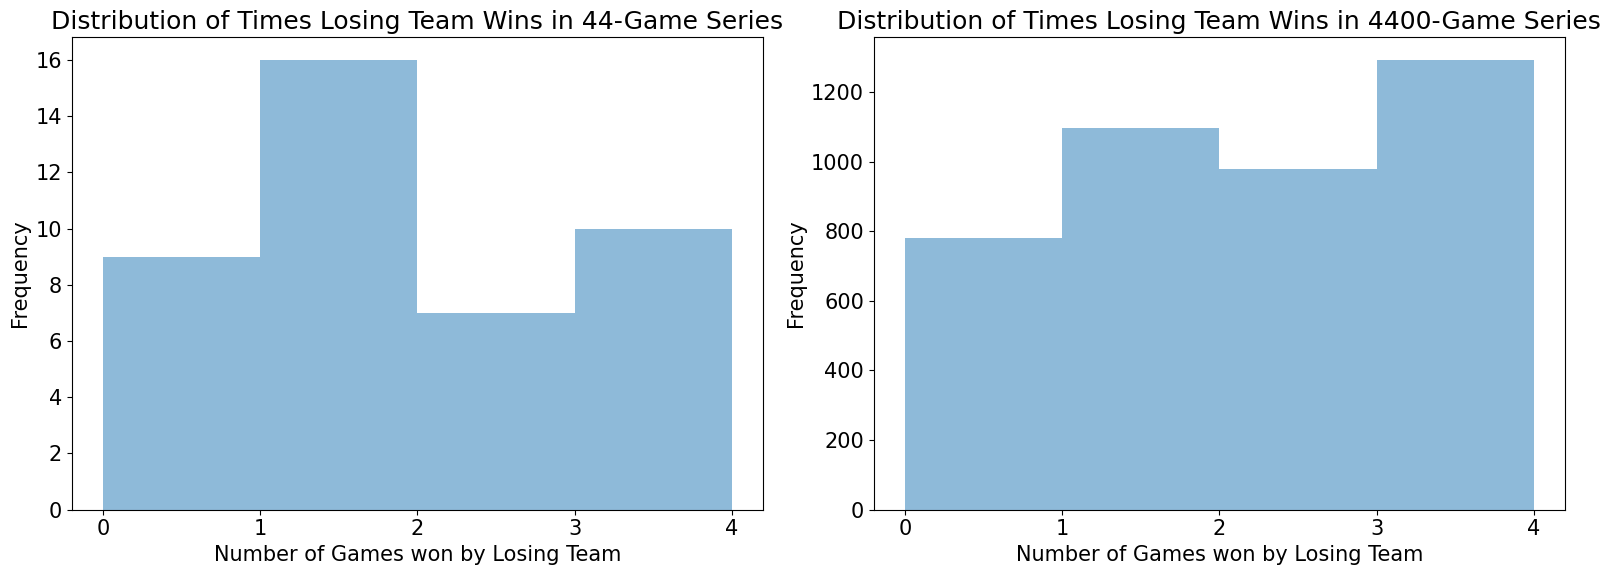

In [37]:
# 44 sets of 7 games
import numpy as np
import matplotlib.pyplot as plt

def simulate_single_game(p):
    # Simulate a single game
    if np.random.uniform() < p:
        return 0  # Winning team wins the game
    else:
        return 1  # Losing team wins the game

# Define parameters
num_series_44 = 44
num_series_4400 = 4400
num_games_per_series = 7
p_mosteller = 0.65

# Compute one series
def simulate_series(num_games, p):
    series_wins_by_losing_team = 0
    series_wins = 0
    for _ in range(num_games):
        outcome = simulate_single_game(p)
        if outcome == 1:
            series_wins_by_losing_team += 1
        else:
            series_wins += 1
        if series_wins == 4:
            break  # End the series if the losing team wins 4 games

    return series_wins_by_losing_team

# Iterate to have multiple series computed
def simulate_multiple_series(num_series, num_games_per_series, p):
    num_games_won = np.zeros(num_series)
    for i in range(num_series):
        num_games_won[i] = simulate_series(num_games_per_series, p)

    return num_games_won

# Simulate the World Series for 44 and 4400 times
num_games_won_44 = simulate_multiple_series(num_series_44, num_games_per_series, p_mosteller)
num_games_won_4400 = simulate_multiple_series(num_series_4400, num_games_per_series, p_mosteller)

# Plot the histograms
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(num_games_won_44, bins=np.arange(5), alpha=0.5, label='44 Series')
plt.xlabel('Number of Games won by Losing Team')
plt.ylabel('Frequency')
plt.xticks(np.arange(5))
plt.title('Distribution of Times Losing Team Wins in 44-Game Series')

plt.subplot(1, 2, 2)
plt.hist(num_games_won_4400, bins=np.arange(5), alpha=0.5, label='4400 Series')
plt.xlabel('Number of Games won by Losing Team')
plt.ylabel('Frequency')
plt.xticks(np.arange(5))
plt.title('Distribution of Times Losing Team Wins in 4400-Game Series')

plt.tight_layout()
plt.show()

The code was written with a help of a student who graduated from Harvard and took the class a while ago.

In [ ]:
# Calculate and display the average number of games won by the losing team in each of the series.
average_44 = np.mean(num_games_won_44)
average_4400 = np.mean(num_games_won_4400)
print('Average Number of Games Won by the Losing Team in the 44-game Simulation: ', average_44)
print('Average Number of Games Won by the Losing Team in the 4400-game Simulation: ', average_4400)


Average Number of Games Won by the Losing Team in the 44-game Simulation:  1.8636363636363635
Average Number of Games Won by the Losing Team in the 4400-game Simulation:  2.0379545454545456


 *Does the fraction of games that the losing team won change significantly by
changing the number of Series played? Were Mosteller’s measurements for the first
fifty years of the twentieth century lucky?*

**The fraction of games won by the losing team changed significantly by changing the number of Series played. We can see in the first graph that due to a limited sample size, there is a huge variance between the number of the won games every single time the simulation is ran. When we increase the sample size, the frequency of winning converges closer to the true value but still does not reach it. That being said, since the graphs are different, the p values are different, so the Monteller model is just lucky, but not robust :(**

*2. In 1976, baseball players were given the right to become free agents, which meant
that they could switch teams much more easily. Analyze the probability that the
better team wins the world series after 1976. If it does not hold, please formulate a
hypothesis of what a new model might be. Note: We have provided a csv file of the
win/loss for all world series on the course web site and github.*

**I will use and modify the code from Lecture 2 notebook**

In [ ]:
!git clone https://github.com/fmottes/Harvard-AM115-2024.git

DATA_PATH = 'Harvard-AM115-2024/Data/'

Cloning into 'Harvard-AM115-2024'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 135 (delta 32), reused 53 (delta 13), pack-reused 61 (from 1)
Receiving objects: 100% (135/135), 11.76 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [ ]:
#read data into pandas dataframe
with open(DATA_PATH+'L02-World_Series_History.csv', 'r') as fh:
    ws_history = pd.read_csv(fh, skiprows=2)

ws_history.head()

,Year,AL Winner,WinsAL,WinsNL,NL Winner
0,2023,Texas Rangers,4,1,Arizona Diamondbacks
1,2022,Houston Astros,4,2,Philadelphia Phillies
2,2021,Houston Astros,2,4,Atlanta Braves
3,2020,Tampa Bay Rays,2,4,Los Angeles Dodgers
4,2019,Houston Astros,3,4,Washington Nationals


In [ ]:
### CLEAN DATASET

#sort and index by year
ws_history = ws_history.sort_values('Year').set_index('Year')

#convert missing data to NaN and delete records
ws_history = ws_history.replace('NoWorldSeries', np.NaN)
ws_history = ws_history.dropna()

#delete years where WS was best-of-nine
ws_history = ws_history.drop([1903,1919,1920,1921])

#convert to correct datatypes
ws_history = ws_history.astype({'AL Winner': str,
                                'WinsAL': 'int32',
                                'WinsNL': 'int32',
                                'NL Winner': str})

ws_history

,AL Winner,WinsAL,WinsNL,NL Winner
Year,,,,
1905,Philadelphia Athletics,1,4,New York Giants
1906,Chicago White Sox,4,2,Chicago Cubs
1907,Detroit Tigers,0,4,Chicago Cubs
1908,Detroit Tigers,1,4,Chicago Cubs
1909,Detroit Tigers,3,4,Pittsburgh Pirates
...,...,...,...,...
2019,Houston Astros,3,4,Washington Nationals
2020,Tampa Bay Rays,2,4,Los Angeles Dodgers
2021,Houston Astros,2,4,Atlanta Braves


In [ ]:
# DATA

#limit data to 1976
ws_mosteller = ws_history.loc[1977:]

#calculate integer outcomes from series results
loser_wins = (ws_mosteller['WinsAL'] + ws_mosteller['WinsNL'] - 4).abs()

loser_wins.head()

### Check we have the same data

n0, n1, n2, n3 = np.bincount(loser_wins.values)

print('Winner\tLoser\tFrequency')
print('-------------------------')
print(f'4\t0\t{n0}')
print(f'4\t1\t{n1}')
print(f'4\t2\t{n2}')
print(f'4\t3\t{n3}')
print('-------------------------')
print(f'Total:\t\t{n0+n1+n2+n3}')

Winner	Loser	Frequency
-------------------------
4	0	8
4	1	10
4	2	14
4	3	14
-------------------------
Total:		46


In [ ]:
#Negative log-likelihood from outcome probabilities
def NLL_Mosteller(p, outcomes):

    n0, n1, n2, n3 = np.bincount(outcomes)

    q = 1-p

    P0 = p**4 + q**4
    P1 = 4*(p**4)*q + 4*p*(q**4)
    P2 = 10*(p**4)*(q**2) + 10*(p**2)*(q**4)
    P3 = 20*(p**4)*(q**3) + 20*(p**3)*(q**4)

    log_likelihood = n0*np.log(P0) + n1*np.log(P1) + n2*np.log(P2) + n3*np.log(P3)

    return -log_likelihood

In [ ]:
# initial (random) guess for p
p_init = .8

#check initial p makes sense
assert p_init > .5 and p_init < 1.


# minimize with scipy routines
# bounds is used to constrain optimizer to stay in regions where taking log(p) makes sense
epsilon = 1e-5
opt_results = scipy.optimize.minimize(lambda p: NLL_Mosteller(p, loser_wins.values),
                                      p_init,
                                      bounds=[(.5 + epsilon, 1. - epsilon)])

p_numeric = opt_results.x.squeeze()

print(f'Numeric min. p = {p_numeric:.4f}')

print(f'MLE reported by Mosteller\t p = 0.6551\n')

print(f'Our numeric estimate\t\t p = {p_numeric:.4f}')

Numeric min. p = 0.5854
MLE reported by Mosteller	 p = 0.6551

Our numeric estimate		 p = 0.5854


**We found that the numeric estimate does not agree with MLE reported by Mosteller ($p_{ne}=0.5854 \neq p_{Mos}=0.6551)$. The reason for it could be that there is no constant $p$. For instance, since there is no free agency,  better players would naturally be attracted to multiple good teams, so some of the teams might have more comparable lineups. For instance, if top 6 players from the top-10 players go to team A, and top 4 go to team B, the match outcome between A and B will not be as easily predictable due to a relative similarity of the rosters' strength, even though the team A has a 'stronger' lineup. That being said, the better model would account for the free flow between teams, a relative strength of the team, and the intensity of the competition in a game.**

*3. In the paper, Mosteller also discussed a model in which p changed from year to year. Modify the code from class to see if this makes much of a difference. A simple way to do this is to add a small random number to p so that it changes from game to game.*

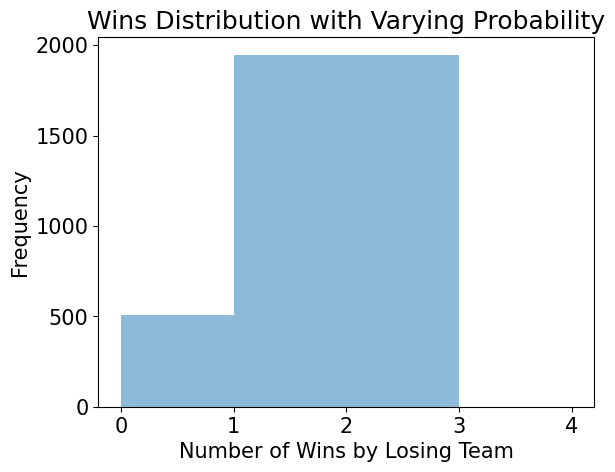

Average number of wins by the losing team with a changing p: 1.3272727272727274
Average number of wins by the losing team with a stable p: 2.0379545454545456


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_series = 4400
probability = 0.65

# Generate random data
random_data = np.random.uniform(size=(total_series, 2))

# Initialize an array to store results
results = np.empty(shape=(0,), dtype=int)

# Simulate series with varying probability
for x, y in random_data:
    adjusted_prob = probability + np.random.uniform() * 0.03 # I adjusted the probability by multiplying a random number by 0.03 which seemed to be a sufficiently small change to me and adding it to the given p=0.65
    wins = (x < adjusted_prob).astype(int) + (y < adjusted_prob).astype(int)
    results = np.append(results, wins)

# Plotting the results
plt.hist(results, bins=np.arange(5), alpha=0.5, label='Series with Varying Probability')
plt.xlabel('Number of Wins by Losing Team')
plt.ylabel('Frequency')
plt.title('Wins Distribution with Varying Probability')
plt.xticks(np.arange(5))
plt.show()

average_wins = np.mean(results)
print("Average number of wins by the losing team with a changing p:", average_wins)

# Compare with the result from part b for the series of 4400 games
print("Average number of wins by the losing team with a stable p:", average_4400)

**By changing the p value from game to game we see that there is a huge difference in the number of the wins by a losing team compared to out previous simulation ($wins_{p_{const}}=2.038, wins_{p_{changing}}=1.328)$. This is a very drastic change which shows that adjusting for p value makes a big difference in calculating probabilities.$**

*4. Identify some reason that you are angry at Mosteller’s Model. Think about how you would change the model to assuage your anger.*

**One of the flaws of the Mostelle's model I am absolutely furious about (!) is the lack of adjustment of the p values from game to game based on the roster's physical and mental state. For instance, we saw above that adjusting the p value from game to game makes a big difference in the game outcome prediction. Then, it would be great if we could incorporate a mindful change of the p value from one game to the other while taking into acount such factors as players' injuries, the number of the payed games this week (to account for physical and mental exhaustion), as well as whether the team plays at home or away.**

##**Problem 3: Adding more features to compute p (10 points)**
 *In Problem 1, you estimated the probability p of the better team winning the series. Now,
let’s explore how additional features in the data could enhance the accuracy of p pre-
diction. In the lecture 2 notebook, we introduced a dataset from Major League Baseball
that includes a set of features about teams that go beyond games won and lost, including
strikeouts, double plays and so forth. The goal of this problem is to create a simple model
that predicts the probability a team wins the world series.*

 *1. Explain what the code in the notebook does. Include in your explanation the following concepts:*

*(a) What does the dropna command do in the line transforming the features?*

**Dropna command deletes years where the WS were the best-of-nine, by deleting the rows that have NA values. This is important for calculating the mean.**


*(b) What is the point of the dataset split into train and text?*

**We split the dataset on the train and test portions because we will need to use the train portion to train the model and the test portion (the data that the model has not seen yet) to check the performance of the model. When we train the model, we input the train data and let the model adjust the  parameters to maximize the likelihood of the observed outcomes given the input features. The test data is then used to assess if the model has properly adjusted all the parameters and is able to predict outcomes when given the new dataset.**

*(c) What is the logistic regression fit predicting?*

**The logistic regression fit is a test to see how well the model performed when given a test set. Here, it is used to predict the winner of the WS given the input and parameters.**

*(d) Explain accuracy, confusion matrix, precision and recall?*

**Accuracy:** the measure of how well the model performed by calculating the proportion of true predictions (true positives and true negatives) from all the predictions made.

**Confusion matrix:** provides a matrix that shows the accuracy of the model's prediction as true and false positives and true and false negatives.

**Precision:** another measure to assess the accuracy of the model. Calculated as $\frac{TP}{TP+FP}$, it provides the accuracy of what portion of predicted true outcomes was actually a true outcome.

**Recall:** another measure to assess the accuracy of the model. Calculated as $\frac{TP}{TP+FN}$, it provides the accuracy of identifying actual positives.




*2. Create and explain the feature importance plot, identifying the features that influence the probability of the better team winning. Does this make sense?*

In [ ]:
## Borrowing the code from Lecture 2 notebook

# imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read data into pandas dataframe
with open(DATA_PATH+'L02-mlb_teams.csv', 'r') as fh:
    feature_data = pd.read_csv(fh)

print('number of rows:', len(feature_data))
feature_data.head()

number of rows: 2784


,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN


In [ ]:
# Define the dependent variable and features
target_var = 'world_series_winner'
features = ['runs_scored',
            'at_bats',
            'hits',
            'doubles',
            'triples',
            'homeruns',
            'walks',
            'strikeouts_by_batters',
            'stolen_bases',
            'caught_stealing',
            'batters_hit_by_pitch',
            'sacrifice_flies',
            'opponents_runs_scored',
            'earned_runs_allowed',
            'earned_run_average',
            'complete_games',
            'shutouts',
            'saves',
            'outs_pitches',
            'hits_allowed',
            'homeruns_allowed',
            'walks_allowed',
            'strikeouts_by_pitchers',
            'errors']

# convert target col to binary and drop NaNs
feature_data[target_var] = feature_data[target_var].map({'Y': 1, 'N': 0})
feature_data = feature_data.dropna(subset=features + [target_var])
print('number of rows after dropping NaNs:', len(feature_data))

# Select relevant data
X = feature_data[features]
y = feature_data[target_var]

number of rows after dropping NaNs: 1386


Accuracy: 0.95

Confusion Matrix:
[[264   0]
 [ 14   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       264
         1.0       0.00      0.00      0.00        14

    accuracy                           0.95       278
   macro avg       0.47      0.50      0.49       278
weighted avg       0.90      0.95      0.93       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: ylabel='Feature'>

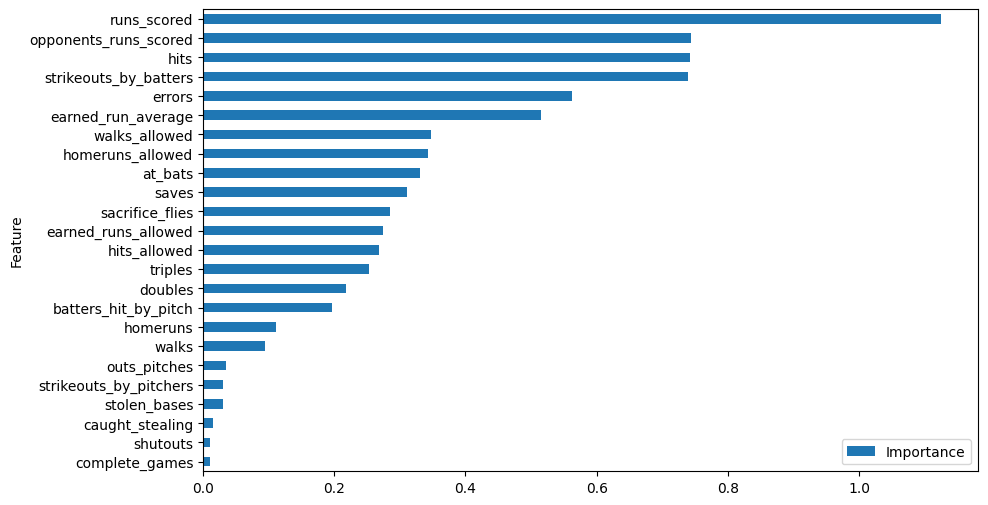

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
## (optional preprocessing but usually done for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train sklearn's logistic Rrgression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Use this to make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Examine feature importance
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

**The feature importance plot uses seasonal statistics to identify which factors most significantly influence the likelihood of the better team winning the World Series.**


**The top five factors with the highest importance are runs scored, opponent's runs scored, hits, strikeouts by batters, and errors. The first two are straightforward: a baseball game's outcome is determined by the number of runs each team scores, making these statistics very important. Runs scored are particularly important as they determine the winner, unlike opponent's runs. Hits and strikeouts are also logical indicators; more hits generally lead to more scoring opportunities, while strikeouts reduce them. Errors can increase the opponent's scoring chances; for instance, a fielding error might allow a ball to remain in play, leading to extra bases for the batter and potentially scoring any runners on base.**


*3. Invent new features and find out if they are more informative for predictions. [Hint:
think about some of the stats you hear about when people discuss baseball, e.g. batting average, winning streaks, run differentials....]. Explain why you’ve chosen these features and transformations and see if the turn out to be important.*

In [ ]:
## Borrowing the code from Lecture 2 notebook

# imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read data into pandas dataframe
with open(DATA_PATH+'L02-mlb_teams.csv', 'r') as fh:
    feature_data = pd.read_csv(fh)
# Add run differential
feature_data['run_differential'] = feature_data['runs_scored'] - feature_data['opponents_runs_scored']
# Calculate singles
feature_data['singles'] = feature_data['hits'] - (feature_data['doubles'] + feature_data['triples'] + feature_data['homeruns'])

# Calculate slugging percentage
feature_data['slugging_percentage'] = (
    (feature_data['singles'] +
     2 * feature_data['doubles'] +
     3 * feature_data['triples'] +
     4 * feature_data['homeruns']) /
    feature_data['at_bats']
)

print(feature_data[['singles', 'slugging_percentage']].head())


print('number of rows:', len(feature_data))
feature_data.head()

# Define the dependent variable and features
target_var = 'world_series_winner'
features_adj = ['runs_scored',
            'at_bats',
            'hits',
            'doubles',
            'triples',
            'homeruns',
            'walks',
            'strikeouts_by_batters',
            'stolen_bases',
            'caught_stealing',
            'batters_hit_by_pitch',
            'sacrifice_flies',
            'opponents_runs_scored',
            'earned_runs_allowed',
            'earned_run_average',
            'complete_games',
            'shutouts',
            'saves',
            'outs_pitches',
            'hits_allowed',
            'homeruns_allowed',
            'walks_allowed',
            'strikeouts_by_pitchers',
            'errors',
            'run_differential',
            'slugging_percentage']

# convert target col to binary and drop NaNs
feature_data[target_var] = feature_data[target_var].map({'Y': 1, 'N': 0})
feature_data = feature_data.dropna(subset=features_adj + [target_var])
print('number of rows after dropping NaNs:', len(feature_data))

# Select relevant data
X = feature_data[features_adj]
y = feature_data[target_var]

   singles  slugging_percentage
0      594             0.328435
1      755             0.416667
2      488             0.270658
3      591             0.321697
4      553             0.293774
number of rows: 2784
number of rows after dropping NaNs: 1386


**I included run differential as one of the new statistics, as well as slugging percentage. Run differential is the variance between the runs the team allows and the runs they earn which is very important in predicting an outcome of the game. To define the slugging percentage, I first calculated the singles as $Singles = Hits - (Doubles + Triples + Home Runs)$. Then, I introduced slugging percentage using the formula $SLG = \frac {Singles + 2*Doubles +3*Triples +4*Home Runs}{At Bats}$.**

**This formula assigns a weight to each type of hit based on the number of bases it earns: singles (1 base), doubles (2 bases), triples (3 bases), and home runs (4 bases). SLG is an important statistic to evaluate a player's ability to hit for power as it reflects how often they hit for extra bases.**


Accuracy: 0.95

Confusion Matrix:
[[264   0]
 [ 13   1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       264
         1.0       1.00      0.07      0.13        14

    accuracy                           0.95       278
   macro avg       0.98      0.54      0.55       278
weighted avg       0.96      0.95      0.93       278



<Axes: ylabel='Feature'>

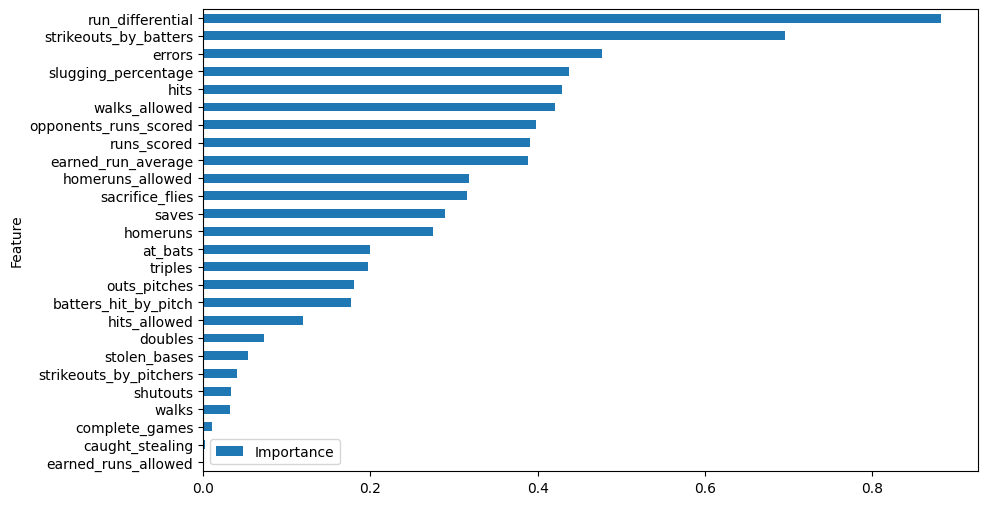

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
## (optional preprocessing but usually done for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train sklearn's logistic Rrgression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Use this to make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Examine feature importance
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

**It looks like run differential plays a crucial role in predicting an outcome of a match which was expected. Slugging percentage makes it to top-4 most important statistics, holding back by just $~0.45$. This aligns with my expectation for the importance of this statistic as to predict an outcome of a match we need to know a player's battling productivity.**

*4. How could you use this type of analysis to improve Mostellar’s model? Note: Just propose ideas, you do not need to carry them out.*

**By introducing multiple variables affecting the outcome of the game, we found that it is very important to take into account different parameters when assessing what team has a better chance of winning. Therefore, one of the ways to improve the Mostellar's model is to take into account different features and statistics to calculate a more accurate $p$ of winning. However, it would be also interesting to explore how the importance of the statistics change depending on a team's style of baseball. For instance, seeing if the statistics importance differ if a team relies heavily on a pitcher's ability to strikeout versus on a 'fielding' portion of the game.**

##**Problem 4: Simulating a tournament (10 points)**

*Consider a tournament with 8 teams.*

*1. From the previous games, estimate pij, the probability that team i will beat team j in
a given game.*

In [1]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 15})

file_id = '17I9fQgdt2rBCPSTa2zMF5ygP9Qaqof65'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'game_results_am115_PS1.csv', quiet=False)

# Load the CSV file
tournament_history = pd.read_csv('game_results_am115_PS1.csv')
print(tournament_history.head())


Downloading...
From: https://drive.google.com/uc?id=17I9fQgdt2rBCPSTa2zMF5ygP9Qaqof65
To: /content/game_results_am115_PS1.csv
100%|██████████| 3.02k/3.02k [00:00<00:00, 2.59MB/s]

   Team 1  Team 2  Winner
0       7       4       7
1       2       3       2
2       2       4       2
3       7       7       7
4       3       7       7


In [36]:
## Collaborated with Nico Hensch when thinking about how to approach problem 4.
# Constants
NUM_TEAMS = 8
initial_matches = [[6, 0], [3, 4], [7, 5], [2, 1]]
print('Initial matches:', initial_matches)

# Get the unique team names from the data
teams = tournament_history['Winner'].unique()

print(f'Total teams: {len(teams)}')

# Define logistic function for probability calculations
def logistic_function(x):
    return 1 / (1 + 10**(-x))

# Function to compute the winning probability based on Elo ratings
def winning_probability(elo_team_a, elo_team_b, S=400):
    return logistic_function((elo_team_a - elo_team_b) / S)

# Initialize Elo ratings for each team
INITIAL_ELO = 1400
elo_ratings = {team: INITIAL_ELO for team in sorted(teams)}

# Elo rating adjustment constant
K_FACTOR = 20

# Iterate through the results to update Elo ratings
for _, match in tournament_history.iterrows():
    winner = match['Winner']
    loser = match['Team 1'] + match['Team 2'] - winner

    # Get the latest Elo ratings
    elo_winner = elo_ratings[winner]
    elo_loser = elo_ratings[loser]

    # Calculate the expected scores
    p_winner = winning_probability(elo_winner, elo_loser)
    p_loser = 1 - p_winner

    # Update Elo ratings
    elo_ratings[winner] += K_FACTOR * (1 - p_winner)
    elo_ratings[loser] += K_FACTOR * (0 - p_loser)

# Display the final Elo rankings
print("\nFinal Elo Rankings:")

sorted_rankings = sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True)

for rank, (team, rating) in enumerate(sorted_rankings, start=1):
    print(f'{rank}\t{rating:.2f}\t\t{team}')

Initial matches: [[6, 0], [3, 4], [7, 5], [2, 1]]
Total teams: 8

Final Elo Rankings:
1	1721.19		7
2	1595.47		5
3	1525.96		0
4	1512.16		1
5	1443.17		6
6	1230.96		2
7	1123.27		3
8	1047.81		4


In [18]:
## Borrowed and modified from Lecture 4 notebook

def convert_elo_to_pair_probabilities(elo_scores, S=400):
    # Create an empty matrix to store the probabilities.
    probabilities = np.zeros((len(elo_scores), len(elo_scores)))

  # Calculate the probability of each team winning against each other team.
    for i in range(len(elo_scores)):

        probabilities[i, i] = 0.5

        for j in range(i + 1, len(elo_scores)):
            # Calculate the expected score difference.
            expected_score_diff = (elo_scores[i] - elo_scores[j]) / S

            # Calculate the probability of team i winning.
            probability_i = 1 / (1 + 10**(-expected_score_diff))

            # Set the probabilities for both i vs j and j vs i (since they are equivalent).
            probabilities[i, j] = probability_i
            probabilities[j, i] = 1 - probability_i

    return probabilities

In [33]:
# Prepare Elo scores for pairwise probability calculations
elo_scores = [elo_ratings[team] for team in sorted(elo_ratings.keys())]

# Calculate pairwise probabilities
P = convert_elo_to_pair_probabilities(elo_scores)

# Print the 8x8 pairwise probability matrix
num_teams = len(elo_scores)
print("\nPairwise Winning Probabilities:")
for i in range(num_teams):
    row_output = []
    for j in range(num_teams):
        if i != j:
            row_output.append(f"{P[i, j]:.4f}")
        else:
            row_output.append("0.0000")  # Diagonal entries are 0
    print(" ".join(row_output))




Pairwise Winning Probabilities:
0.0000 0.5199 0.8453 0.9104 0.9401 0.4013 0.6169 0.2453
0.4801 0.0000 0.8346 0.9037 0.9354 0.3823 0.5980 0.2309
0.1547 0.1654 0.0000 0.6502 0.7416 0.1093 0.2277 0.0561
0.0896 0.0963 0.3498 0.0000 0.6069 0.0619 0.1369 0.0310
0.0599 0.0646 0.2584 0.3931 0.0000 0.0410 0.0931 0.0203
0.5987 0.6177 0.8907 0.9381 0.9590 0.0000 0.7061 0.3266
0.3831 0.4020 0.7723 0.8631 0.9069 0.2939 0.0000 0.1679
0.7547 0.7691 0.9439 0.9690 0.9797 0.6734 0.8321 0.0000


**The probability matrix above is a $p_{ij}$ matrix where a probability of team $i$ winning against team $j$ is reflected as the $ij$ entrance in the  matrix. The team can't play itself, so the corresponding entrances are equal to $0$.**

*2. Given your estimates of pij, carry out simulations of the draw. For each team, predict
the probability that it reaches the semi-finals; the finals and is the tournament champion. Thus you should create a matrix $W_{ij}$, where the first index labels the team, and
the second index $W_{i0}$ is the probability the team makes the semi finals; $W_{i1}$ is the
probability that the team makes the finals and $W_{i2}$ is the probability that the team
makes the finals.*

In [35]:
import numpy as np
import pandas as pd

def simulate_8team_tournament(initial_matches, P, num_teams):

    # Quarter-finals
    semi_final = []
    for i, j in initial_matches:
        win_i = bool(np.random.uniform() < P[i, j])
        if win_i:
            semi_final.append(i)
        else:
            semi_final.append(j)

    # Semi-finals
    final = []
    for i, j in zip(semi_final[::2], semi_final[1::2]):
        win_i = bool(np.random.uniform() < P[i, j])
        if win_i:
            final.append(i)
        else:
            final.append(j)

    # Final
    i, j = final
    win_i = bool(np.random.uniform() < P[i, j])
    winner = i if win_i else j

    return [initial_matches, semi_final, final, winner]

def calculate_probabilities(initial_matches, P, num_simulations=10000):
    W = np.zeros((8, 3))

    for _ in range(num_simulations):
        _, semi_final, final, winner = simulate_8team_tournament(initial_matches, P, 8)

        for team in semi_final:
            W[team, 0] += 1

        for team in final:
            W[team, 1] += 1

        W[winner, 2] += 1

    W /= num_simulations

    return W

# Simulate and calculate probabilities
num_simulations = 100000
probability_matrix = calculate_probabilities(initial_matches, P, num_simulations)

df_submission = pd.DataFrame(probability_matrix, columns=["0", "1", "2"])
df_submission.reset_index(inplace=False)

print(df_submission)



         0        1        2
0  0.61638  0.56797  0.20092
1  0.83330  0.23588  0.13290
2  0.16670  0.01214  0.00257
3  0.60518  0.06482  0.00371
4  0.39482  0.02943  0.00116
5  0.32646  0.21549  0.14357
6  0.38362  0.33778  0.08678
7  0.67354  0.53649  0.42839


3. **Results were submitted to Kaggle.**

4. **For a real sports competition like March Madness, I would analyze historical game data to estimate the probability of each team winning against another using a model that I would create based on factors such as team performance, player statistics, and head-to-head results. Creating the model would require me to gather and clean a dataset (that I am not sure where I would get wrom), which could present challenges like missing data, inconsistent formats, or the need to account for biases such as home-court advantage. Also, accurately predicting winning probabilities could be difficult due to factors like player injuries, changes in team strategy, and the inherent variability of sports outcomes.**

##**Problem 5: Apply these ideas to a tennis match (10 points)**
*Use the mathematical formalism that we have introduced to write out a series of steps to create a mathematical model for a tennis match. You are only required to write out the series of steps, not implement the steps.*

1. *Make a model for an individual game, where there is a probability that a player wins
a point is a parameter. Note that whoever serves typically has a higher probability
of winning a point. Note that there is a serious complication over the world series,
which is that a player must win by two points. How can you deal with this?*

**My model will consist of four main parameters: $P_{is}$ and $P_{js}$ represent the probability that player $i$ or $j$ wins a point when serving, while $P_{ir}$ and $P_{jr}$ are their respective probabilities when receiving. To address the increase in the probability of scoring during the serve, I will ensure that $P_{is} > P_{ir}$ and $P_{js} > P_{jr}$ when running the simulation. To enhance the model, I can also introduce a stamina factor for each player, based off such factors as age, previous game statistics, and injuries, denoted as $S_i$ and $S_j$. This parameter accounts for the physical endurance of the players, reflecting that as the match progresses, their ability to win points may decline. For instance, after every four points played, I could reduce their probabilities of winning points slightly.**

**With these four probabilities, I can conduct Monte Carlo simulations for each game, treating every point as a Bernoulli trial. Each simulation will have two scenarios: one where player $i$ serves, using $P_{is}$ and $P_{jr}$, and another where player $j$serves, using $P_{js}$ and $P_{ir}$. To adhere to the two-points rule, I will introduce a function that will simulate additional rounds until one player has a 2-point lead.**


2. *Given the probability that a player wins a game, turn this into the probability that
they will win a set. Assume tiebreakers are not allowed, and just assume that (like in
the case of the game) that a player must win by two games.*

**To turn game-winning probability into set-winning probability without tiebreakers, I can start by calculating the game-winning probabilities. Let $P_{{game},i}$ be the probability that player $i$ wins a single game, and $P_{{game},j} = 1 - P_{{game},i}$ be the probability that player $j$ wins a single game. To win a set, a player must win at least 6 games and lead by 2 games. The probability of winning a set can then be modeled as a binomial distribution with a stopping rule to account for this win-by-two condition. The probability that player $i$ wins a set is the cumulative probability of winning 6 games while maintaining a 2-game lead, represented as:
$$P_{{set},i} = \sum_{g=6}^{N} P_{{win-by-two}}(g, P_{{game},i})$$
where $P_{{win-by-two}}(g, P_{\text{game},i})$ represents the probability that player $i$ wins $g$ games while maintaining at least a 2-game lead.**


3. *A match is 2 out of 3 sets.*

**For this case I can use the same parameteres and probabilities defined above. I can model individual games as Bernoulli trials within Monte Carlo simulations, with random variables X and Y representing sets won by each player and taking probabilities found above as inputs for the Bernoulli trials. I can define the sample space $Ω$ and event space $F$, calculate match-winning probabilities, and estimate match duration using similar approaches I used in this problem set.**